# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.rename({
    'GRADES_PK_G':'ENROLL_PK',
    'GRADES_KG_G':'ENROLL_K',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    ,
    'AVG_MATH_4_SCORE':'MATH_4_AVG',
    'AVG_READING_4_SCORE':'READING_4_AVG',
    'AVG_MATH_8_SCORE':'MATH_8_AVG',
    'AVG_READING_8_SCORE':'READING_8_AVG'
    },
    axis=1,inplace=True)
# rename columns to be more intuitive and faster to type

df.dropna(subset=['MATH_4_AVG'], inplace=True)
# remove all rows without math 4 scores

df.head()
df["MATH_4_AVG"].isna().sum()
#check if above worked


np.int64(0)

In [5]:
# i want to look at instruction expenditure, so i will first check for missing data
print(df["INSTRUCTION_EXPENDITURE"].isna().sum())
print(df[df["STATE"]=="MICHIGAN"]["INSTRUCTION_EXPENDITURE"].isna().sum()) #check some states
print(df[df["STATE"]=="CALIFORNIA"]["INSTRUCTION_EXPENDITURE"].isna().sum())

# i can see that for each state only around 2 cells are missing for instruction expenditure
# so to fill it in, i will use the state mean for each state
states = df.groupby(["STATE"]) #group by state
df["INSTRUCTION_EXPENDITURE"] = states["INSTRUCTION_EXPENDITURE"].transform(lambda s: s.fillna(s.mean()))

print(df[df["STATE"]=="MICHIGAN"]["INSTRUCTION_EXPENDITURE"].isna().sum()) #check if it worked

# i am also interested in support services expenditure, as well as total expenditure
print(df["SUPPORT_SERVICES_EXPENDITURE"].isna().sum())
print(df["TOTAL_EXPENDITURE"].isna().sum())
# i will employ the same method to fill these in
df["SUPPORT_SERVICES_EXPENDITURE"] = states["SUPPORT_SERVICES_EXPENDITURE"].transform(lambda s: s.fillna(s.mean()))
df["TOTAL_EXPENDITURE"] = states["TOTAL_EXPENDITURE"].transform(lambda s: s.fillna(s.mean()))




125
2
2
0
125
125


In [6]:
# i am also interested in expenditure per student
# so like in the tutorial, i will fill in missing enrollment estimate cells with the enrollment values
print(df["ENROLL_ALL_EST"].isna().sum())
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])
print(df["ENROLL_ALL_EST"].isna().sum()) #check
print(df["ENROLL_ALL"].isna().sum())

# there are still missing values, so i am again going to fill them in with the mean per state
df["ENROLL_ALL_EST"] = states["ENROLL_ALL_EST"].transform(lambda s: s.fillna(s.mean()))
df["ENROLL_ALL"] = states["ENROLL_ALL"].transform(lambda s: s.fillna(s.mean()))

167
74
74


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset? 

In [7]:
# @@@ 1
# Your Code
df["YEAR"].nunique()

13

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [8]:
# @@@ 2
print(states["MATH_4_AVG"].mean())

michavg = df[df["STATE"]=="MICHIGAN"]["MATH_4_AVG"].mean()
ohioavg = df[df["STATE"]=="OHIO"]["MATH_4_AVG"].mean()
#get only rows with desired state and compute average
print(michavg)
print(ohioavg)

STATE
ALABAMA                 226.090909
ALASKA                  234.777778
ARIZONA                 230.909091
ARKANSAS                231.545455
CALIFORNIA              227.909091
COLORADO                239.400000
CONNECTICUT             239.909091
DELAWARE                237.200000
DISTRICT_OF_COLUMBIA    216.545455
DODEA                   241.600000
FLORIDA                 238.800000
GEORGIA                 232.545455
HAWAII                  232.181818
IDAHO                   237.000000
ILLINOIS                235.400000
INDIANA                 241.181818
IOWA                    240.090909
KANSAS                  242.600000
KENTUCKY                233.636364
LOUISIANA               226.636364
MAINE                   240.000000
MARYLAND                236.818182
MASSACHUSETTS           246.000000
MICHIGAN                234.363636
MINNESOTA               245.000000
MISSISSIPPI             226.272727
MISSOURI                236.090909
MONTANA                 240.400000
NATIONAL      

Find the average for your chosen test across all states in 2019

In [9]:
# @@@ 3
df[df["YEAR"]==2019]["MATH_4_AVG"].mean()

np.float64(239.9433962264151)

For each state, find a maximum value for your chosen test score

In [10]:
# @@@ 4
states["MATH_4_AVG"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [11]:
# @@@ 5
pd.set_option("display.max_columns", None) #so i can view all the column names at once when i call df.head()

# the tutorial checked support services expenditure per student, which i am still interested in
df['SS_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
# i am also interested in instruction expenditure instead, so i will make a column for that too
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df["INSTRUCTION_EXPENDITURE"] / df['ENROLL_ALL']
# and i will also make a column for total expenditure per student
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df["TOTAL_EXPENDITURE"] / df['ENROLL_ALL']

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,ENROLL_PK,ENROLL_K,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,MATH_4_AVG,MATH_8_AVG,READING_4_AVG,READING_8_AVG,SS_EXPENDITURE_PER_STUDENT,INSTRUCTION_EXPENDITURE_PER_STUDENT,TOTAL_EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,1.004650,2.025197,3.627221
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,1.496312,2.132082,5.050774
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,1.095128,2.184247,3.948044
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,1.621537,2.732512,5.164536
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,1035970.0,NaN,364760.0,7410.0,47588.0,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,1.691007,2.680986,5.329154


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'average math 4 score')

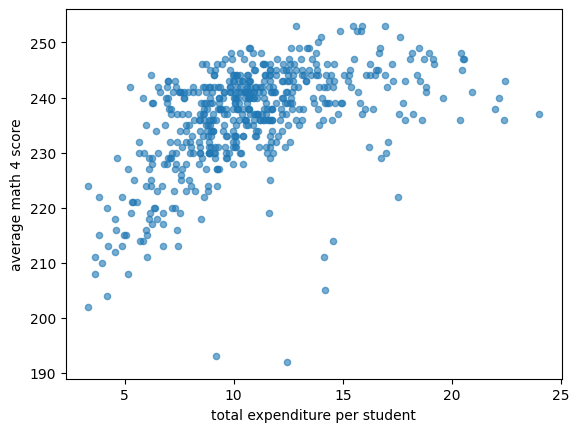

In [12]:
# @@@ 6
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT', y='MATH_4_AVG', alpha=0.6)
plt.xlabel('total expenditure per student')
plt.ylabel('average math 4 score')

**TOTAL EXPENDITURE PER STUDENT**

seems like there is a moderate but positive correlation between average math 4 scores and total expenditure per student. it could be linear(?)

**Visualization 2**

Text(0, 0.5, 'average math 4 score')

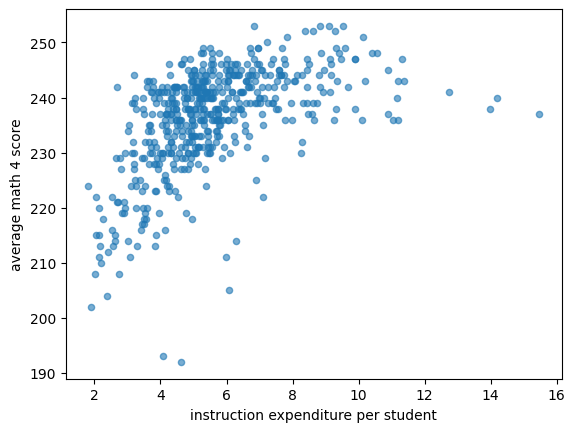

In [13]:
# @@@ 7
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='MATH_4_AVG', alpha=0.6)
plt.xlabel('instruction expenditure per student')
plt.ylabel('average math 4 score')

**INSTRUCTION EXPENDITURE PER STUDENT**

again, seems to be a moderate positive correlation between instruction expenditure per student and average math 4 score. this plot also looks to have significant outliers near the 12, 14, and 16 instruction expenditure per student
without these outliers, the correlation is fairly linear

Text(0, 0.5, 'average math 4 score')

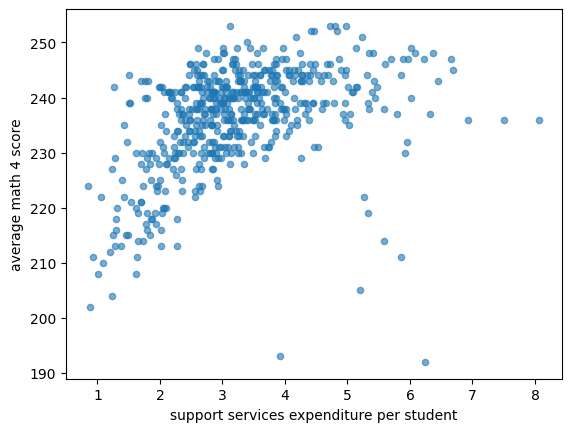

In [14]:
# finally, i am also looking at support services expenditure per student
df.plot.scatter(x='SS_EXPENDITURE_PER_STUDENT', y='MATH_4_AVG', alpha=0.6)
plt.xlabel('support services expenditure per student')
plt.ylabel('average math 4 score')

slightly weaker positive correlation with more outliers

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# @@@ 8

X = df[['INSTRUCTION_EXPENDITURE_PER_STUDENT','SS_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['MATH_4_AVG']

y.isna().sum() #check fo NaN in y

np.int64(0)

In [17]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=67)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [18]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression


In [19]:
# @@@ 11
# create your model here
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [21]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [22]:
# @@@ 12

print(model.score(X_test, y_test)) #get R^2 (its not great)
print(np.mean(np.abs(y_pred-y_test))) #get mean residual

0.24290127870925493
5.436656995810734


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

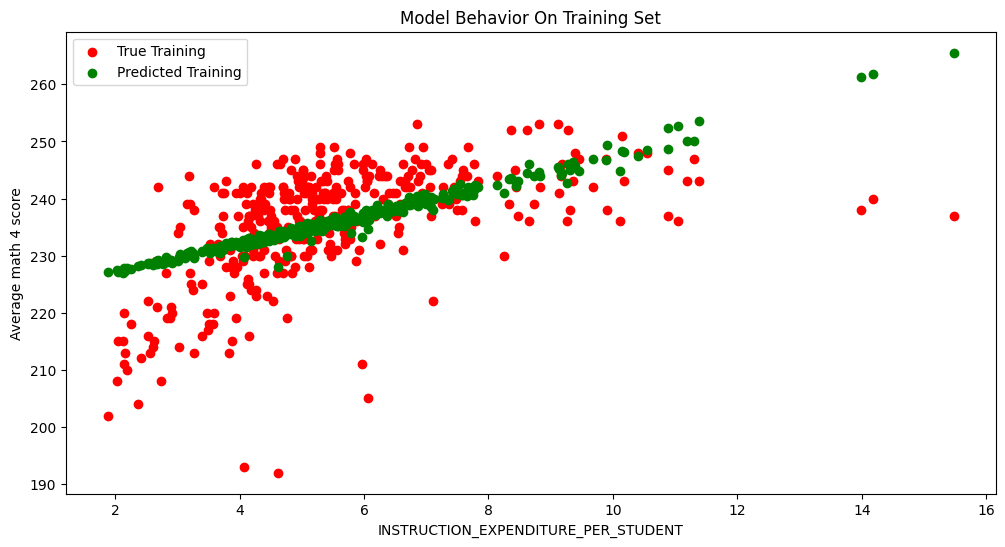

In [25]:
# @@@ 13

col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average math 4 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

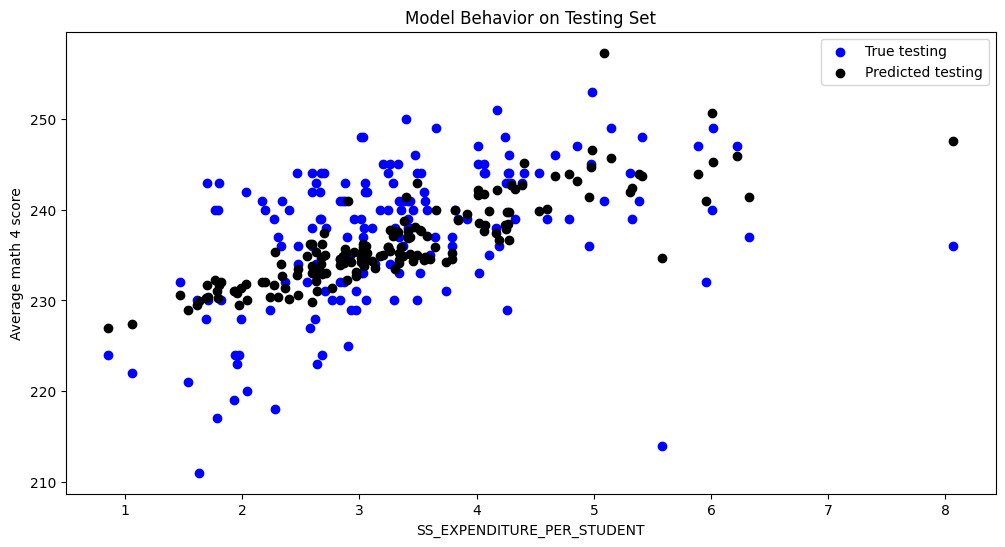

In [26]:
# @@@ 14


col_name = 'SS_EXPENDITURE_PER_STUDENT'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average math 4 score')
plt.title("Model Behavior on Testing Set")